In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [116]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [117]:
df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [118]:
df.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [119]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [120]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

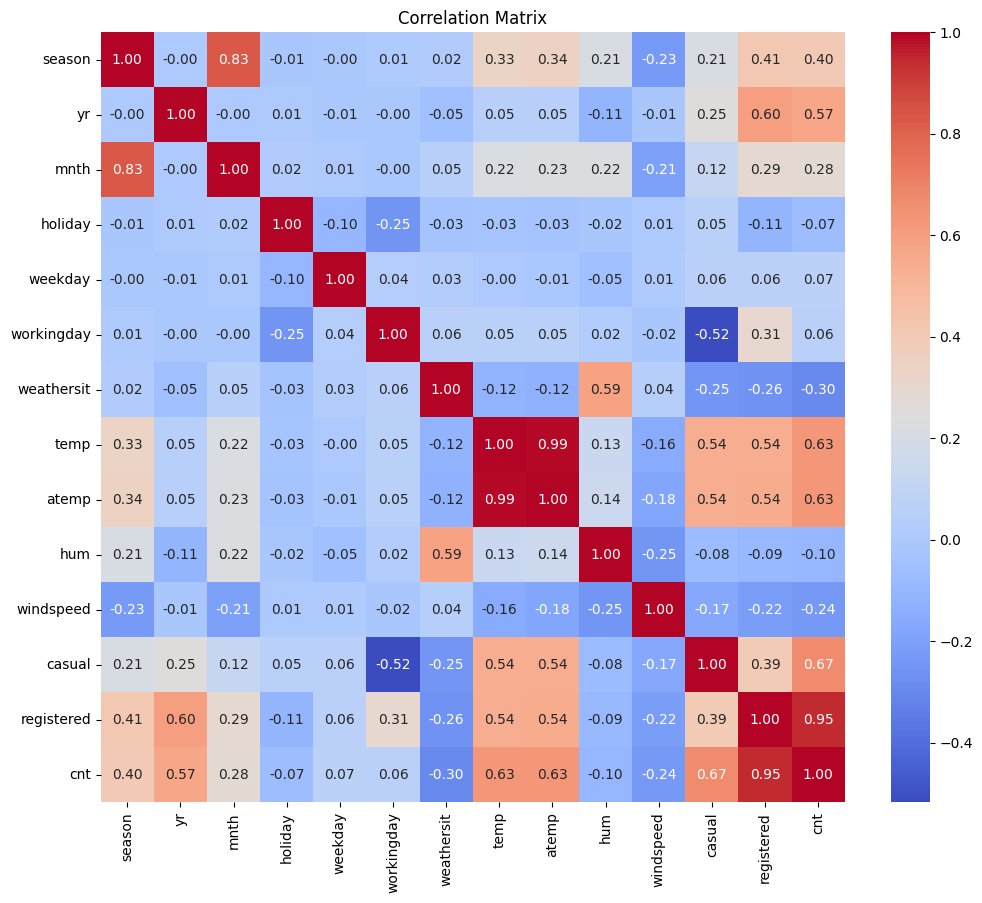

In [121]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [122]:
correlated_features = correlation_matrix[(correlation_matrix['cnt'] > 0.5) | (correlation_matrix['cnt'] < -0.5)].index

In [123]:
correlated_features

Index(['yr', 'temp', 'atemp', 'casual', 'registered', 'cnt'], dtype='object')

In [124]:
correlated_features = correlated_features.drop(['cnt','yr', 'temp', 'atemp','casual'])
print("Correlated features with 'cnt':\n", correlated_features)

Correlated features with 'cnt':
 Index(['registered'], dtype='object')


In [125]:
X = df[correlated_features]
Y = df['cnt']

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [128]:
y_pred = model.predict(X_test)

In [129]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 409997.14260604006


In [130]:
X_test.shape

(146, 1)

In [131]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_test: (146, 1)
Shape of y_test: (146,)


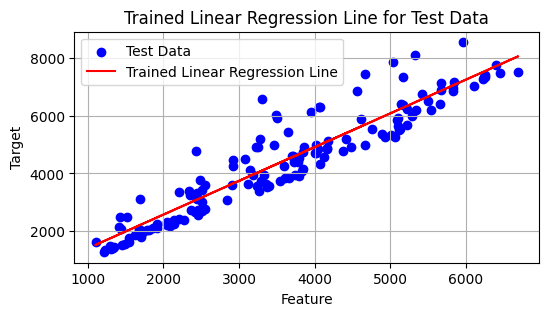

In [132]:
import matplotlib.pyplot as plt

# Plot the trained linear regression line for the test data
plt.figure(figsize=(6, 3))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Trained Linear Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Trained Linear Regression Line for Test Data')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11140\3885282452.py:28: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


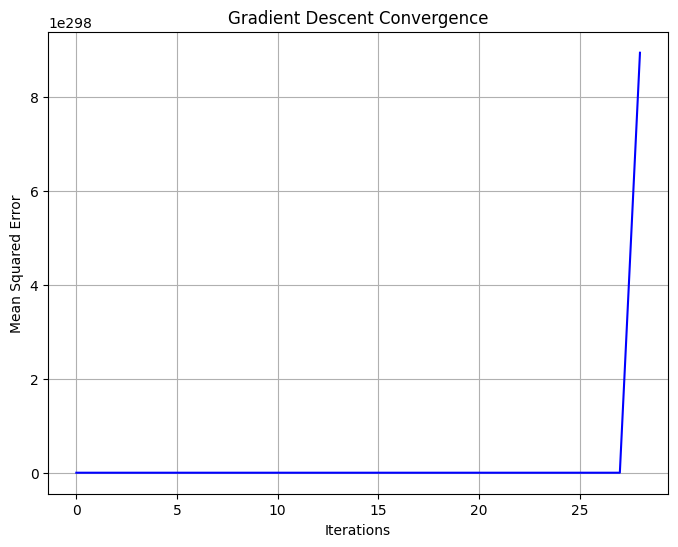

In [133]:
import numpy as np
def gradient_descent(X, y, learning_rate=0.01, num_iterations=100):
    """
    Perform gradient descent to minimize the mean squared error (MSE).
    
    Parameters:
        X (ndarray): Input features (shape: (m, n)).
        y (ndarray): Target values (shape: (m, )).
        learning_rate (float): Learning rate for gradient descent (default: 0.01).
        num_iterations (int): Number of iterations for gradient descent (default: 100).
    
    Returns:
        theta (ndarray): Optimal parameters (shape: (n, )).
        losses (list): List of loss values over iterations.
    """
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    
    for _ in range(num_iterations):
        # Compute predictions
        y_pred = np.dot(X, theta)
        
        # Compute gradient
        gradient = (1/m) * np.dot(X.T, (y_pred - y))
        
        # Update parameters
        theta -= learning_rate * gradient
        
        # Compute mean squared error (loss)
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
    
    return theta, losses

# Generate random linear data
np.random.seed(42)
# Run gradient descent using training data
theta, losses = gradient_descent(X_train, y_train)

# Plot the convergence of the loss function
plt.figure(figsize=(8, 6))
plt.plot(range(len(losses)), losses, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()


ValueError: cannot broadcast a non-scalar to a scalar array

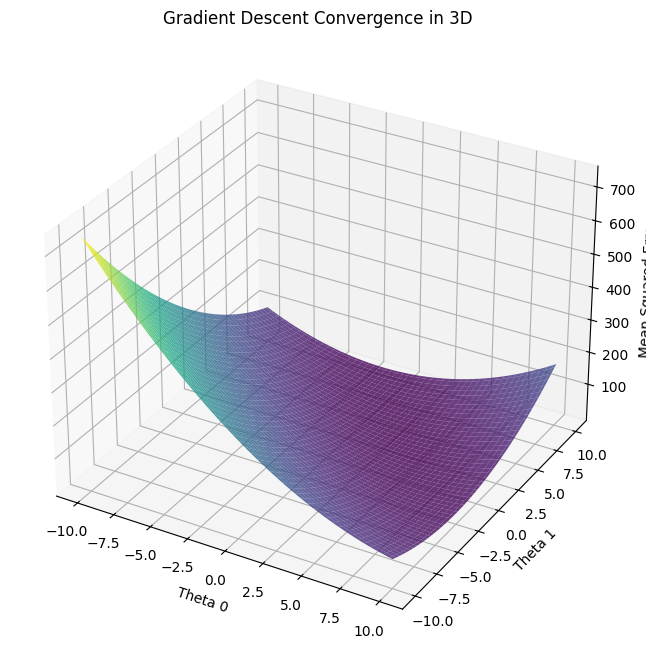

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

def gradient_descent(X, y, learning_rate=0.01, num_iterations=100):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []

    for _ in range(num_iterations):
        y_pred = np.dot(X, theta)
        gradient = (1/m) * np.dot(X.T, (y_pred - y))
        theta -= learning_rate * gradient
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

    return theta, losses

# Generate random linear data
np.random.seed(42)
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train.squeeze() + np.random.randn(100)

# Add a bias term to the features
X_train_b = np.c_[np.ones((100, 1)), X_train]

# Run gradient descent using training data
theta, losses = gradient_descent(X_train_b, y_train)

# Plot the convergence of the loss function in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create grid for theta0 and theta1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
loss_grid = np.zeros_like(theta0_grid)

# Calculate loss for each combination of theta0 and theta1
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        y_pred = theta0_vals[i] + theta1_vals[j] * X_train
        loss_grid[i, j] = mean_squared_error(y_train, y_pred)

# Plot surface
ax.plot_surface(theta0_grid, theta1_grid, loss_grid, cmap='viridis', alpha=0.8)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Mean Squared Error')
ax.set_title('Gradient Descent Convergence in 3D')

# Plot gradient descent path
ax.plot(theta[0], theta[1], losses, marker='x', color='red', markersize=10, label='Final Parameters')

plt.legend()
plt.show()


In [ ]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [135]:
X_test.shape

(146, 1)

In [136]:
n_rows = X_test.shape[0]

In [137]:
X=X_test.to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=y_test.to_numpy().reshape(n_rows,1)

In [139]:
compute_cost(X, y)


array([11192643.84246575])

In [140]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
#         print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [163]:
%%time
num_iterations=29

theta_init=np.array([[1],[1]])
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,alpha, num_iterations)

CPU times: total: 15.6 ms
Wall time: 23 ms


In [164]:
theta


array([[3.89995504e+145],
       [1.61944049e+149]])

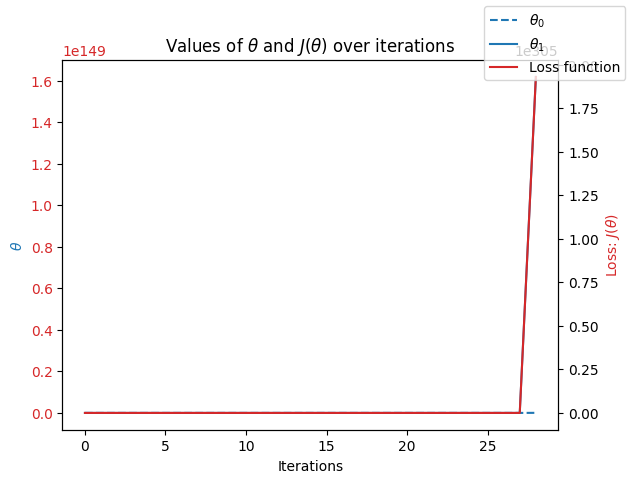

In [165]:
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

In [166]:
%%time
# theta range
theta0_vals = np.linspace(-10,0,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.53 s
Wall time: 3.26 s


In [167]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed